In [1]:
import pyvisa
import json
import matplotlib.pyplot as plt
import numpy as np
import time
import os
rm = pyvisa.ResourceManager()
rm.list_resources()

('TCPIP0::132.163.130.19::INSTR',
 'ASRL1::INSTR',
 'ASRL3::INSTR',
 'GPIB0::10::INSTR',
 'GPIB0::18::INSTR',
 'GPIB0::19::INSTR',
 'GPIB0::3::INSTR',
 'GPIB0::7::INSTR',
 'GPIB1::10::INSTR',
 'GPIB1::19::INSTR',
 'GPIB2::19::INSTR')

## Manuals
 - [link to E7405 spectrum analyzer manual](https://testworld.com/wp-content/uploads/programming-guide-agilent-hp-e7402a-e7405a-emc-analyzers.pdf)
 - [link to E4438 signal generator manual](https://keysight-docs.s3-us-west-2.amazonaws.com/keysight-pdfs/E4438C-502/Signal+Generators+Programming+Guide.pdf)

In [3]:
spectrum_analyzer_gpib = rm.open_resource('GPIB0::18::INSTR')
source_gpib = rm.open_resource('GPIB0::19::INSTR')

In [5]:
spectrum_analyzer_gpib.query('*IDN?')

'Hewlett-Packard, E7405A, SG45102671, A.14.04\n'

In [7]:
source_gpib.query('*IDN?')

'Agilent Technologies, E4438C, MY44250148, C.04.98\n'

In [9]:
source_gpib.query('FREQ:CW?')

'+5.0000000000000E+09\n'

In [415]:
source_gpib.write('OUTP:STAT ON')

14

In [216]:
'''
spectrum_analyzer_gpib.write('*RST')
spectrum_analyzer_gpib.write('SENS:FREQ:CENT 4 GHz ')
spectrum_analyzer_gpib.write('SENS:FREQ:SPAN 10 kHz ')
spectrum_analyzer_gpib.write('INIT:CONT 0 ')
spectrum_analyzer_gpib.write('INIT:IMM;*WAI ')
spectrum_analyzer_gpib.write('UNIT:POW W')
spectrum_analyzer_gpib.write('INIT:IMM;*WAI ')
spectrum_analyzer_gpib.write('FORM:DATA ASC ')
spectrum_analyzer_gpib.write('INIT:IMM;*WAI ')
data = spectrum_analyzer_gpib.query('TRAC:DATA? TRACE1')
data_array = data.split(',')
plt.plot(data_array)
spectrum_analyzer_gpib.write('UNIT:POW W')
'''
numpoints = int(spectrum_analyzer_gpib.query('SENSE:SWEEP:POINTS?'))
start_frequency = float(spectrum_analyzer_gpib.query('SENSE:FREQ:STARt?'))
stop_frequency = float(spectrum_analyzer_gpib.query('SENSE:FREQ:STOP?'))
frequency = np.linspace(start_frequency,stop_frequency,numpoints)
frequency

array([4.9999950e+09, 4.9999951e+09, 4.9999952e+09, 4.9999953e+09,
       4.9999954e+09, 4.9999955e+09, 4.9999956e+09, 4.9999957e+09,
       4.9999958e+09, 4.9999959e+09, 4.9999960e+09, 4.9999961e+09,
       4.9999962e+09, 4.9999963e+09, 4.9999964e+09, 4.9999965e+09,
       4.9999966e+09, 4.9999967e+09, 4.9999968e+09, 4.9999969e+09,
       4.9999970e+09, 4.9999971e+09, 4.9999972e+09, 4.9999973e+09,
       4.9999974e+09, 4.9999975e+09, 4.9999976e+09, 4.9999977e+09,
       4.9999978e+09, 4.9999979e+09, 4.9999980e+09, 4.9999981e+09,
       4.9999982e+09, 4.9999983e+09, 4.9999984e+09, 4.9999985e+09,
       4.9999986e+09, 4.9999987e+09, 4.9999988e+09, 4.9999989e+09,
       4.9999990e+09, 4.9999991e+09, 4.9999992e+09, 4.9999993e+09,
       4.9999994e+09, 4.9999995e+09, 4.9999996e+09, 4.9999997e+09,
       4.9999998e+09, 4.9999999e+09, 5.0000000e+09, 5.0000001e+09,
       5.0000002e+09, 5.0000003e+09, 5.0000004e+09, 5.0000005e+09,
       5.0000006e+09, 5.0000007e+09, 5.0000008e+09, 5.0000009e

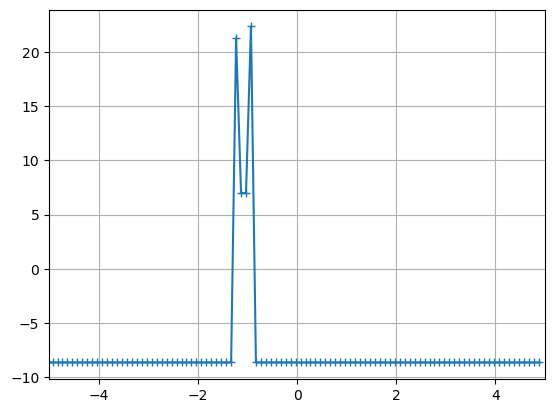

In [326]:
numpoints = int(spectrum_analyzer_gpib.query('SENSE:SWEEP:POINTS?'))
start_frequency = float(spectrum_analyzer_gpib.query('SENSE:FREQ:STARt?'))
stop_frequency = float(spectrum_analyzer_gpib.query('SENSE:FREQ:STOP?'))
frequency = np.linspace(start_frequency,stop_frequency,numpoints)

data = spectrum_analyzer_gpib.query('TRAC:DATA? TRACE1')
data_string_list = data.split(',')
number_list = []
for number_string in data_string_list:
    number_list.append(float(number_string))
number_array = np.array(number_list)
plt.plot((frequency - 5e9)/1e3,number_array,'+-')
plt.xlim(-5,5)
plt.grid()

Text(0, 0.5, 'Power [nW]')

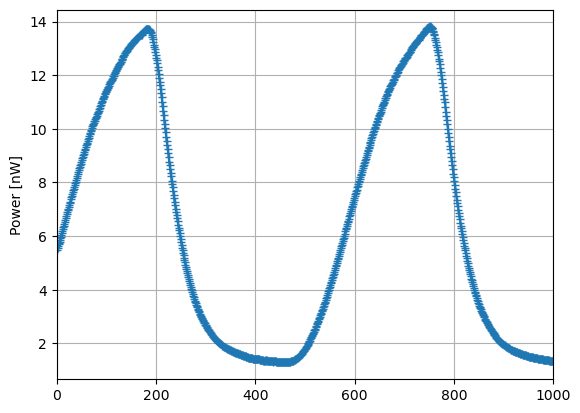

In [15]:

frequency = 5e9 + 0e3

source_gpib.write('FREQ:CW ' + str(frequency))
time.sleep(0.025)
data = spectrum_analyzer_gpib.query('TRAC:DATA? TRACE1')
data_string_list = data.split(',')
number_list = []
for number_string in data_string_list:
    number_list.append(float(number_string))
number_array = np.array(number_list)
plt.plot(number_array/1e-9,"-+")
plt.grid()
plt.xlim(0,len(number_array))
plt.ylabel('Power [nW]')

In [359]:
number_array

array([6.13338e-10, 7.82889e-10, 1.01111e-09, 1.29390e-09, 1.60398e-09,
       1.87845e-09, 2.12961e-09, 2.38561e-09, 2.73653e-09, 3.14051e-09,
       3.55222e-09, 3.92374e-09, 4.23545e-09, 4.42079e-09, 4.53524e-09,
       4.58036e-09, 4.55617e-09, 4.49780e-09, 4.39440e-09, 4.17542e-09,
       3.87347e-09, 3.50106e-09, 3.04719e-09, 2.58643e-09, 2.16023e-09,
       1.78567e-09, 1.45245e-09, 1.20282e-09, 1.01391e-09, 8.74581e-10,
       7.53876e-10, 6.39440e-10, 5.36290e-10, 4.40758e-10, 3.55386e-10,
       2.75613e-10, 2.30462e-10, 2.14487e-10, 2.31473e-10, 2.53805e-10,
       2.84577e-10, 3.22849e-10, 3.88687e-10, 5.09096e-10, 6.75150e-10,
       8.60796e-10, 1.04713e-09, 1.25458e-09, 1.48218e-09, 1.69942e-09,
       1.94223e-09, 2.19584e-09, 2.46604e-09, 2.72584e-09, 3.01926e-09,
       3.28927e-09, 3.54813e-09, 3.80189e-09, 4.04576e-09, 4.23741e-09,
       4.31917e-09, 4.30031e-09, 4.24131e-09, 4.07662e-09, 3.83442e-09,
       3.53997e-09, 3.23147e-09, 2.89135e-09, 2.51246e-09, 2.155

In [399]:
spectrum_analyzer_gpib.query('SENSe:SWEep:TIME?')

'+1.00000000E-002\n'

In [397]:
spectrum_analyzer_gpib.write('SENSe:SWEep:TIME 0.01')

23

In [ ]:
source_gpib.write('FREQ:CW ' + str(frequency))

In [324]:

while True:
    file_object = open("xy.json", "r")
    try:
        xy = json.loads(file_object.read())
    except ValueError:
        pass
    file_object.close()
    frequency_min = 5e9 - 1e4
    frequency_max = 5e9 + 1e4
    frequency = (np.round((frequency_min + xy['x']*(frequency_max - frequency_min))*100))/100
    source_gpib.write('FREQ:CW ' + str(frequency))
'''
    power_min = -70
    power_max = -40
    power = (np.round((power_min + xy['y']*(power_max - power_min))*1000))/1000
    #arb_gpib.write('VOLTage ' + str(voltage)) # amplitude peak to peak in volts
    source_gpib.write('POW:AMPL ' + str(power)) # offset voltage in volts
    time.sleep(0.01)

'''

KeyboardInterrupt: 

In [310]:
#source_gpib.write('POW:AMPL -54.0')
#source_gpib.write('FREQ:CW 5.0000001e9')


16

In [ ]:
source_gpib.close()
spectrum_analyzer_gpib.close()